 #COVID-19 DATA DASHBOARD



# "Ultimately, the greatest lesson that COVID-19 can teach humanity is that we are all in this together."-Kiran Mazumdar-Shaw.


SARS stands for the severe acute respiratory syndrome. In 2003, an outbreak of SARS affected people in several countries before ending in 2004. The coronavirus that causes COVID-19 is similar to the one that caused the 2003 SARS outbreak. Since the 2019 coronavirus is related to the original coronavirus that caused SARS and can also cause the severe acute respiratory syndrome, there is “SARS” in its name: SARS-CoV-2. Much is still unknown about these viruses, but SARS-CoV-2 spreads faster and farther than the 2003 SARS-CoV-1 virus. This is likely because of how easy it is transmitted from person to person, even from asymptomatic carriers of the virus. Coronaviruses are a large family of viruses that cause illnesses ranging from the common cold to more severe diseases. A novel coronavirus is a new strain that has not been previously identified in humans. The new virus was subsequently named the “COVID-19 virus”.The coronavirus COVID-19 pandemic is the defining global health crisis of our time and the greatest challenge we have faced till now. Since its emergence in Asia in 2019, the virus has spread to every continent except Antarctica.

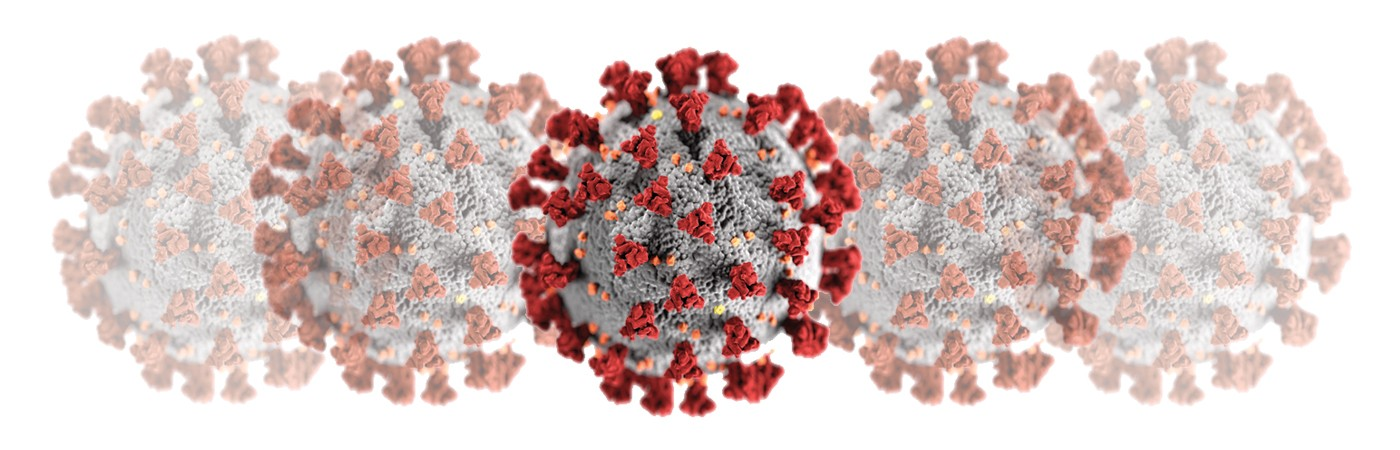

In [197]:
# libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [198]:
# Data loading from github repository of jhon hopkins
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
# death_df.drop('Lat',axis='columns', inplace=True)
# death_df.drop('Long',axis='columns', inplace=True)
# death_df.drop('Province/State',axis='columns', inplace=True)
# country_df.drop('Lat',axis='columns', inplace=True)
# country_df.drop('Long_',axis='columns', inplace=True)

In [ ]:
# Data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [ ]:
# changing province/state to state and country/region to country
country_df = country_df.rename(columns={'country_region': 'country'})
country_df = country_df[['country','last_update','confirmed','deaths','recovered','active']]
confirmed_df = confirmed_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})

# delete state as it contains nan value and it will cause problem while plotting map

# confirmed_df.drop('state', axis=1 ,inplace=True)




In [ ]:
# Total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

# CURRENT CASES COVID-19 CASES

In [ ]:
# Displayt of Total cases:

display(HTML("<div style = 'background-color:#B6D0E2; padding: 30px '>" +
             "<span style='color: blue; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: green; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# DATA OF THE TOP AFFECTED COUNTRY

In [ ]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color:  coral'
    y = 'background-color: lightblue'
    g = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 2] = y
    df1.iloc[:, 3] = r
    df1.iloc[:, 4] = g
    
    return df1

def show_latest_cases(Number):
    Number= int(Number)
    return country_df.sort_values('confirmed', ascending= False).head(Number).style.apply(highlight_col, axis=None)

interact(show_latest_cases, Number='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

In [ ]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(10)
import plotly.io as plt_io
import plotly.express as px
plt_io.templates["Gapminder 2007"] = plt_io.templates["plotly_white"]




# TOP 5 MOST AFFECTED COUNTRY

In [ ]:
import plotly.express as px 


    
fig = px.scatter(sorted_country_df.head(5), x="country", y="confirmed", size="confirmed", color="country",
          hover_name="country", size_max=60)
#  update done according to us

fig.update_layout(
    title=str(5) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 1000
    )
fig.layout.template = 'Gapminder 2007'
   
fig.show()

#FACT ABOUT COVID-19:

1. Covid-19 cannot be transmitted through mosquitoes.
2. Drinking alcohol, such as beer, liquor, wine doesn’t help prevent coronavirus
3. COVID-19 virus can spread in cold as well as hot climate. Virus has nothing to do with climate.
4. spraying alcohol or chlorine on your body donnot kill the virus inside.
5. Rinsing the nose with saline cannot protect against the coronavirus
6. The virus donnot die when temperatures rise

# 10 Worst hit countries data:

# Confirm Cases

In [ ]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(10)
import plotly.io as plt_io
import plotly.express as px
plt_io.templates["Mt Bruno Elevation"] = plt_io.templates["simple_white"]



In [ ]:
fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["Blue"], 
    height=500,
    width=600
)
fig.layout.template = 'Mt Bruno Elevation'
fig.show()
 



# Death Cases

In [ ]:

fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=600
)
fig.layout.template = 'Mt Bruno Elevation'
fig.show()

# Recovered Cases

In [ ]:
fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=600
)
fig.layout.template = 'Mt Bruno Elevation'
fig.show()

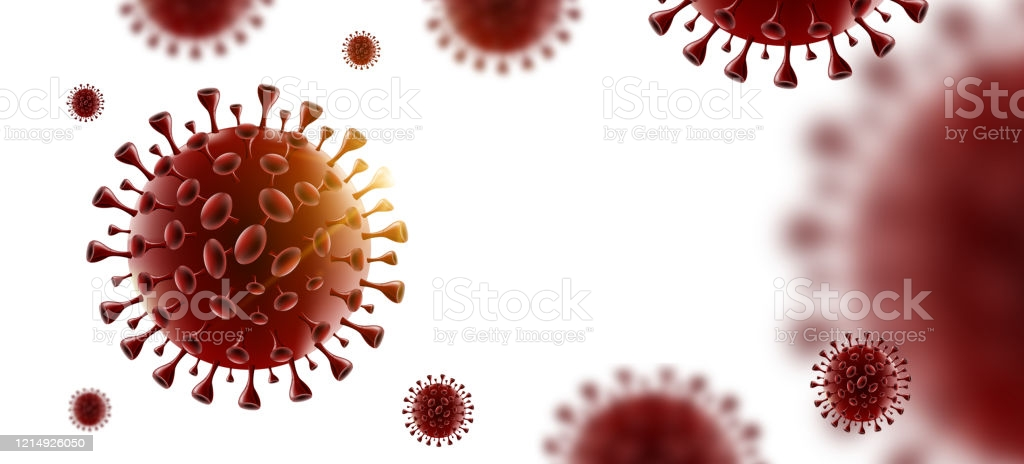

#FACTS ABOUT COVID-19 VACCINES:

1. If one have already been infected with COVID-19 in the past, still they should and can be vaccinated.
2. Researchers did not rush the development of the COVID-19 vaccine, so it is effective as well as trustworthy.
3. Individuals who get the COVID-19 vaccination still need to practice infection prevention precautions and always Keep the        mask on in public places
4. The side effects of the COVID-19 vaccine are not dangerous.

In [ ]:
vaccination_df = pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')

In [ ]:

vaccination_df.drop('ISO3',axis='columns', inplace=True)
vaccination_df.drop('WHO_REGION',axis='columns', inplace=True)
vaccination_df.drop('DATA_SOURCE',axis='columns', inplace=True)
vaccination_df.drop('NUMBER_VACCINES_TYPES_USED',axis='columns', inplace=True)
vaccination_df.drop('TOTAL_VACCINATIONS_PER100',axis='columns', inplace=True)
vaccination_df.drop('PERSONS_VACCINATED_1PLUS_DOSE_PER100',axis='columns', inplace=True)
# vaccination_df.drop('VACCINES_USED',axis='columns', inplace=True)

In [ ]:

vaccination_df=vaccination_df.rename(columns={'PERSONS_VACCINATED_1PLUS_DOSE':'DOSE1_VACCINATION'})
vaccination_df=vaccination_df[['COUNTRY','DATE_UPDATED','TOTAL_VACCINATIONS','DOSE1_VACCINATION','FIRST_VACCINE_DATE','VACCINES_USED']]

# conver nan and NaN values

In [ ]:
vac_total = (vaccination_df['TOTAL_VACCINATIONS'].sum())
vac2_total= (vaccination_df['DOSE1_VACCINATION'].sum())


In [ ]:
display(HTML("<div style = 'background-color:#FFC0CB; padding: 30px '>" +
             "<span style='color: Maroon; font-size:30px;'> Total Vaccination: "  + str(vac_total) +"</span>" + 
             "<span style='color: Maroon; font-size:30px; margin-left:20px;'> Dose1 Vaccination: " + str(vac2_total) + "</span>"+
             "</div>")
       )

In [ ]:

vaccination_df['TOTAL_VACCINATIONS'] =vaccination_df['TOTAL_VACCINATIONS'].replace(np.nan, 0)
vaccination_df['DOSE1_VACCINATION'] =vaccination_df['DOSE1_VACCINATION'].fillna(0)
vaccination_df['FIRST_VACCINE_DATE'] =vaccination_df['FIRST_VACCINE_DATE'].fillna(0)


# convert into million
vaccination_df['TOTAL_VACCINATIONS']=(vaccination_df['TOTAL_VACCINATIONS'].astype(float)/1000000)
vaccination_df['DOSE1_VACCINATION']=(vaccination_df['DOSE1_VACCINATION'].astype(float)/1000000).round(2).astype(str) + 'M'


def show_latest_cases(Number):
    Number= int(Number)
    return vaccination_df.sort_values('TOTAL_VACCINATIONS', ascending= False).head(Number)

vaccination1_df=vaccination_df.sort_values('TOTAL_VACCINATIONS', ascending= False).head(10)

interact(show_latest_cases, Number='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
# widgets.VBox([fig], layout=ipywLayout)

#VACCINATION GUIDLINE:


DO'S
1. Register and schedule your vaccination in advance
2. Register online through Co-WIN OR Aarogya Setu OR UMANG platform
3. Register against only one phone number and one proof of ID
4. Carry ID proof when you go for vaccination
5. Search for nearest vaccination centre online from Co-WIN OR Aarogya Setu or Umang and select centre convenient for vaccination
6. Reach Vaccination Centre on the specified date and time
7. Wait for 30 minutes at the vaccination centre after vaccination
8. Inform Helpline Number: +91-11-23978046 (Toll free- 1075) in case of any side effect after leaving vaccination centre
9. Continue precautions of social distancing and wearing masks

DONT'S
1. One-person register in multiple platforms
2. Consume alcohol or other intoxicants on the day of vaccination
3. Donnot Register again for second dose








In [ ]:
fig = px.scatter(vaccination1_df,x="COUNTRY", y="TOTAL_VACCINATIONS", size="TOTAL_VACCINATIONS", color="COUNTRY",
               hover_name="COUNTRY", size_max=60)
    
fig.update_layout(
    title="TOTAL VACCINATION DONE(in millions)",
    xaxis_title="Countries",
    yaxis_title="VACCINATION DONE",
    width = 1000
    )

fig.layout.template = 'Gapminder 2007'

fig.show()

# Confirmed v/s death case graph

Enter the country name of which you want information.(keep the first letter capital eg-India)

In [ ]:
import plotly.graph_objects as go

In [ ]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,5:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
            name=labels[i],
            line=dict(color=colors[i], width=line_size[i]),
            connectgaps=True,
            text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
             ))  
        
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="white",
        width = 800,
    )
         
    fig.show()
interact(plot_cases_of_a_country, country='World')
        
   
#     plot_cases_of_a_country('US')
   
     
        

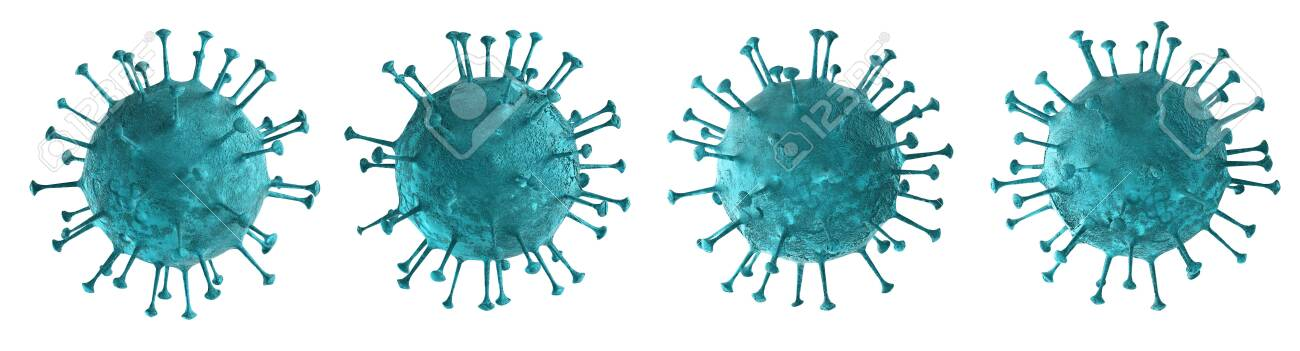

            |

In [ ]:
import folium

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df = confirmed_df.rename(columns={'Province/State':'state','Country/Region':'country'})

confirmed_df.Lat = confirmed_df.Lat.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.Long = confirmed_df.Long.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.Lat=confirmed_df.Lat.fillna(0)
confirmed_df.Long=confirmed_df.Long.fillna(0)


In [ ]:
world_map = folium.Map(location=[20,0], tiles="Stamen Terrain", zoom_start=2)
# confirmed_df.dropna(subset=['lat'],inplace=True)
# confirmed_df.dropna(subset=['long'],inplace=True)

for i in range(0,len(confirmed_df)):
    folium.Marker( 
    location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
#     fill=True,
#     radius= (int((np.log(confirmed_df.iloc[i,-1]+1.00001))) + 0.2)*50000,
#     fill_color='white' ,
#     color='red',
    tooltip= "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
    ).add_to(world_map)
world_map

#SYMPTOMS:

#Most common symptoms:
1. Fever
2. Dry cough
3. Tiredness

#Less common symptoms:
1. Aches and pains
2. Sore throat
3. Diarrhoea
4. Conjunctivitis
5. Headache
6. Loss of taste or smell
7. A rash on skin, or discolouration of fingers or toe

#PREVENTION TIPS:


1. Wear a mask or face covering in public places
2. Don’t go out if you’re feeling sick or have any cold or flu symptoms.
3. Avoid crowd or large gathering of people
4. Don’t touch your face, eyes, nose, or mouth when your hands are dirty.
5. Clean any objects you touch a lot. Use disinfectants on objects like phones, computers, and doorknobs etc.
6. Cover your mouth with a tissue or the inside of your elbow whenever you sneeze or cough. Throw away any tissues you use right away


#TOGETHER WE CAN OVERCOME!

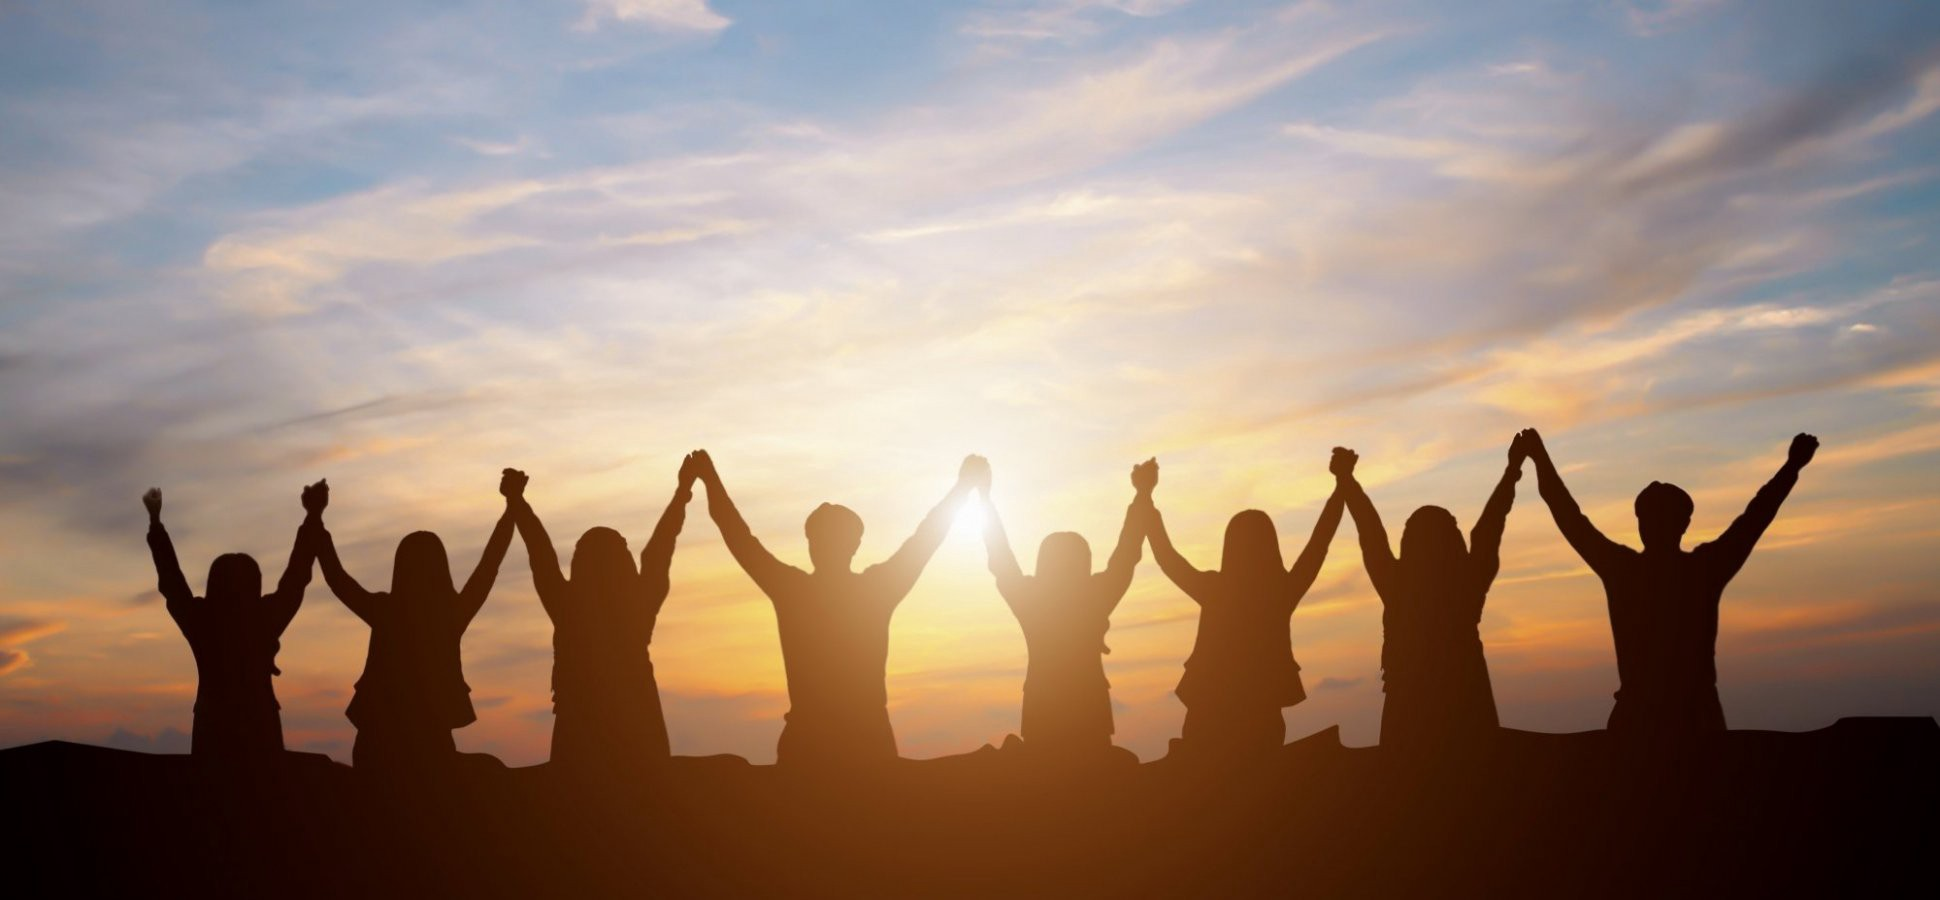